In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Dataset .csv to Dataset .csv


MOST POSITIVE AND NEGATIVE KEY WORDS

In [ ]:
from IPython.display import display
from google.colab import files
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Downloading NLTK resources (only needed once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
# Downloading the specific 'punkt_tab' resource that was missing
nltk.download('punkt_tab')

# Loading the dataset
df = pd.read_csv('Dataset .csv')

# Checking column names
print("DataFrame columns:", df.columns)

# Setting the correct column name for reviews
review_col = 'Rating text'

# Check existence
if review_col not in df.columns:
    print(f"Available columns: {df.columns.tolist()}")
    raise ValueError(f"Column '{review_col}' not found. Please check the column names in your CSV file.")

# Dropping missing review rows in the specified review column
df = df.dropna(subset=[review_col])

# Initializing sentiment analyzer
sia = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))

# Cleaning the review text
def clean_text(text):
    if not isinstance(text, str):
        return []
    tokens = nltk.word_tokenize(text.lower())
    return [word for word in tokens if word.isalpha() and word not in stop_words and len(word) > 2]

# Storing the words
positive_words = []
negative_words = []


# Initializing sentiment analyzer
sia = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))

# Clean review text
def clean_text(text):
    if not isinstance(text, str):
        return []
    tokens = nltk.word_tokenize(text.lower())
    return [word for word in tokens if word.isalpha() and word not in stop_words and len(word) > 2]

# Storing words
positive_words = []
negative_words = []


for review in df[review_col].astype(str):
    score = sia.polarity_scores(str(review))['compound']
    words = clean_text(str(review))
    if score >= 0.3:
        positive_words.extend(words)
    elif score <= -0.3:
        negative_words.extend(words)

# Counting common words
positive_common = Counter(positive_words).most_common(10)
negative_common = Counter(negative_words).most_common(10)

# Converting to DataFrames for cleaner display
pos_df = pd.DataFrame(positive_common, columns=['Keyword', 'Frequency'])
neg_df = pd.DataFrame(negative_common, columns=['Keyword', 'Frequency'])

print("\n🔹 Most Common Positive Keywords:")
display(pos_df)

print("\n🔹 Most Common Negative Keywords:")
display(neg_df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


DataFrame columns: Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

🔹 Most Common Positive Keywords:


,Keyword,Frequency
0,good,3179
1,excellent,301



🔹 Most Common Negative Keywords:


,Keyword,Frequency
0,poor,186


Length of reviews and relationship

📏 Average Review Length: 1.34 words

📊 Review Length Stats:
count    9551.000000
mean        1.337870
std         0.473009
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Review_Length, dtype: float64


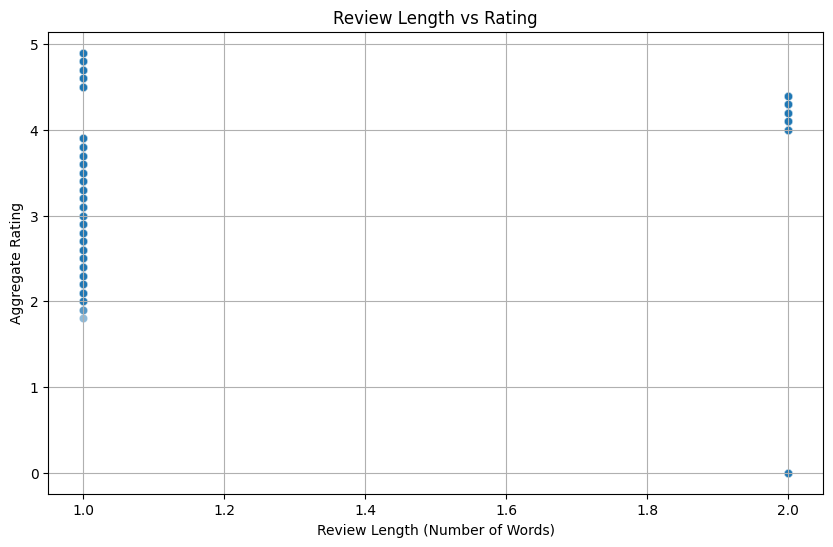


🔗 Correlation between review length and rating: -0.60


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
df = pd.read_csv('Dataset .csv')
review_col = 'Rating text'
rating_col = 'Aggregate rating'

if review_col not in df.columns or rating_col not in df.columns:
    print(f"Attempted to access review_col: '{review_col}', rating_col: '{rating_col}'")
    raise ValueError("Check column names. Available columns:\n", df.columns.tolist())

# Drop the missing data
df = df.dropna(subset=[review_col, rating_col])

# Convert
df['Review_Length'] = df[review_col].astype(str).apply(lambda x: len(x.split()))

# Calculating average review length
avg_length = df['Review_Length'].mean()
print(f"📏 Average Review Length: {avg_length:.2f} words")
# Display basic stats
print("\n📊 Review Length Stats:")
print(df['Review_Length'].describe())

#  Scatter plot: Review length vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Review_Length', y=rating_col, alpha=0.5)
plt.title('Review Length vs Rating')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()

#  Correlation
correlation = df['Review_Length'].corr(df[rating_col])
print(f"\n🔗 Correlation between review length and rating: {correlation:.2f}")